In [1]:
import numpy as np
import pandas as pd
from ipywidgets import *
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('houses.csv')
df

,area,price
0,1,1
1,2,2
2,3,3
3,4,4


For this tutorial, we'll use the dataset above as our training sample. An area, price pair like (1, 1) is a training set. Since we want to predict the price of a house given it's size, **area** will be our input variable and **price** the output variable. We want to find a model that takes in the size of a house and outputs it's price. 

Let's call this model $h$ and define it as $h:X \mapsto Y$ -- $h$ maps $X$ to $Y$ -- where $X$ is the input variable and $Y$ the output variable.


Plotting our training sample

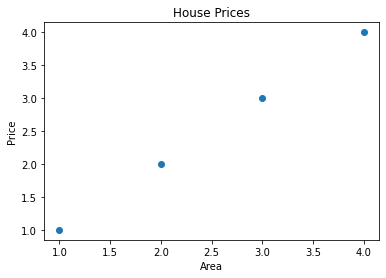

In [2]:
plt.scatter(df.area, df.price)
plt.title('House Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

We will approximate $h$ as a linear function. For purposes of simplicity let's define our **hypothesis** function $h$  as $h(x) = \theta x_1$

$\theta$ parameterizes $h$. The task now is to find a optimal $\theta$ value so that the hypothesis ouputs an accurate price prediction. We can express the hypothesis function in Python as below

In [3]:
def hypothesis(theta, x):
    return theta * x


## Cost Function
The **cost function** measures how accurate the prediction is and is defined as $J(\theta)=\frac{1}{2m}\sum_{1}^{m}(h(x_i)-y_i)^2$ where $h(x_i)$ is the predicted house price for the ith entry in our training sample and $y_i$ is real house price.

We can write the cost function in Python like below.

In [4]:
def cost_function(theta, training_data):
    result = 0
    for index, training_set in training_data.iterrows():
        predicted = hypothesis(theta, training_set['area'])
        square_diff = (predicted - training_set['price']) ** 2
        result = square_diff / (2 * len(training_data.index))
    return result


The snippet below demonstrates how $\theta$ affects the cost -- output of cost function. The higher the cost the less accurate the prediction.

In [5]:
print('theta=1: result=', cost_function(1, df))
print('theta=1.5: result=', cost_function(1.5, df))
print('theta=2: result=', cost_function(2, df))

theta=1: result= 0.0
theta=1.5: result= 0.5
theta=2: result= 2.0


## Visualising Hypothesis and Cost Function

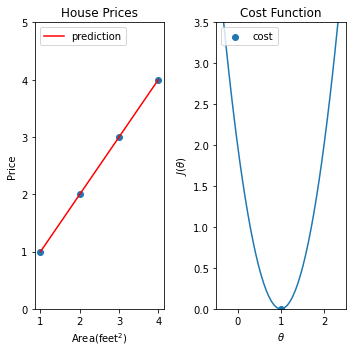

interactive(children=(FloatSlider(value=1.0, description='theta', max=3.0, min=-1.0), Output()), _dom_classes=…

<function __main__.update(theta=1.0)>

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

def plot_prediction(theta):
    x1 = np.linspace(0.0, 5.0)
    y1 = np.linspace(0.0, 5.0)

    axes[0].set_ylim(0, 5.0)

    axes[0].set_title('House Prices')
    axes[0].set_xlabel('Area(feet$^2$)')
    axes[0].set_ylabel('Price')

    axes[0].scatter(df.area, df.price)
    axes[0].plot(df.area, theta*df.price, color='red', label='prediction')
    axes[0].legend(loc='upper left')

def plot_cost(theta):
    x2 = np.linspace(-0.5, 2.5)
    y2 = [cost_function(x, training_data=df) for x in x2]

    axes[1].set_ylim(0, 3.5)
    axes[1].set_xlim(-0.5, 2.5)

    axes[1].set_title('Cost Function')
    axes[1].set_xlabel(r'$\theta$')
    axes[1].set_ylabel(r'$J(\theta)$')

    axes[1].scatter(theta, cost_function(theta, df), label='cost')
    axes[1].legend(loc='upper left')
    axes[1].plot(x2, y2)
    
plot_prediction(theta=1.0)
plot_cost(theta=1.0)
fig.tight_layout()
def update(theta = 1.0):
    axes[0].clear()
    axes[1].clear()

    plot_prediction(theta)
    plot_cost(theta)

 
interact(update)

In the diagram above, the predicted house prices are equal to the real house prices when the **cost** is 0. The further the cost is from 0 the less accurate the predicted house prices. The task now is to find a $\theta$ that results in minimal cost.

## Parameter Learning
We have seen by inspection how the parameter $\theta$ affects the predicted values and observed that the closer the **cost** is to 0 the better our prediction, next, we are goin to implement **gradient descent**, an algorithm that learns the optimal value for $\theta$.


#### Gradient Descent
Gradient descent finds a $\theta$ that will give the best prediction. It works by starting with a guess value for $\theta$ say $\theta = 2$


The code below plots the cost given $\theta$.

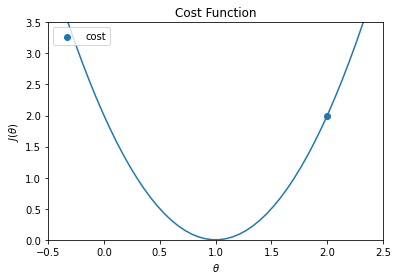

In [7]:
def cost(theta):
    plt.figure()

    x2 = np.linspace(-0.5, 2.5)
    y2 = [cost_function(x, training_data=df) for x in x2]

    plt.ylim(0, 3.5)
    plt.xlim(-0.5, 2.5)

    plt.title('Cost Function')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$J(\theta)$')

    plt.scatter(theta, cost_function(theta, df), label='cost')
    plt.plot(x2, y2)
    plt.legend(loc='upper left')
    plt.show()

cost(theta=2)

In order to minimise the cost and get accurate predictions we need to go downwards to the global minima. We can do that by getting the gradient at the current $\theta$ value and substracting that gradient from $\theta$ to get a new $\theta$ value that is closer to the global minima.


Let's indulge in some math

The cost function is defined as

$J(\theta) = \frac{1}{2m}\sum_{1}^{m}(h(x_i) - y_i)^2$

and our prediction function -- hypothesis -- is defined as

$h(x_i) = \theta x_i$

Since the cost function uses the prediction function we can rewrite the cost function replacing $h(x_i)$ with $\theta x_i$

$J(\theta) = \frac{1}{2m}\sum_{1}^{m}(\theta x_i - y_i)^2$

At $\theta$ = 2,

$J(2) = \frac{1}{2m}\sum_{1}^{m}(2x_i - y_i)^2$, where m is the number of entries in our training data and i is the ith training set.

For purposes of demonstration, let's assume we have one training set, so we won't need to sum them together and we can do away with i. This simplifies our equation to

$J(2) = \frac{1}{2}(2x - y)^2$

We can find the gradient at $\theta = 2$ by applying the **chain rule**

$\frac{d}{d\theta}J(2) = \frac{d}{d\theta}\frac{1}{2}(2x - y)^2$
            
$= 2 \times \frac{1}{2}(2x - y)x$ 

$= (2x - y)x$, where $x$ is the house area and $y$ the house price

If our training set is (1.5, 1.5), house area of size 3 and price of 3 dollars, then  our new theta will be 

$\theta = 2 - (2 \times 1.5 - 1.5)1.5$

$\theta = 0.25$


Plotting our $\theta$



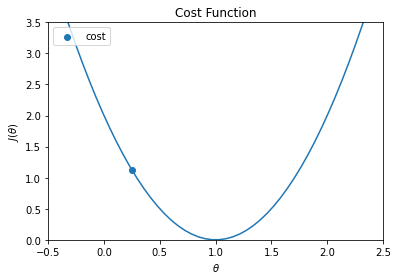

In [8]:
cost(theta=0.25)

What the hell just happened? We passed our destination -- global minima. We can fix this by introducing a learning rate $\alpha$ that scales the gradient so that we take small steps towards the global minima. If you use a big learning rate you might never get to the global minima and choosing too small a learning rate might mean spending 40 years in the wilderness before reaching the promised land -- global minima.

Rewriting our equation with a learning rate

$\theta = 2 - \alpha (2 \times 1.5 - 1.5)1.5$

Let's set $\alpha$ to a reasonable value say 0.25

$\alpha = 0.25$

$\theta = 2 - 0.25 (2 \times 1.5 - 1.5)1.5$

Then our new $\theta$ will be

$\theta = 1.437$

Plotting our theta



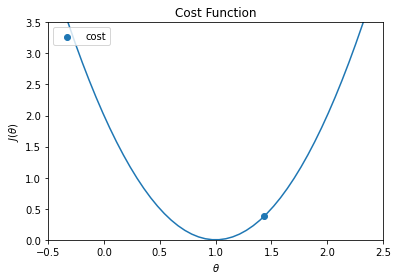

In [9]:
cost(theta=1.437)

Nice, we are moving in the right direction and closer to the global optima.

#### Generalizing Gradient Descent

What we saw was a particular solution for $\theta = 2$. To be able to apply this for any $\theta$ we need to generalize the gradient descent algorithm. For those who are mathematically inclined they can go through the equations below.

$\theta = \theta - \alpha\frac{d}{d\theta} J(\theta)$

Since $J(\theta)=\frac{1}{2m}\sum_{1}^{m}(h(x_i)-y_i)$

Then $\theta = \theta - \alpha\frac{d}{d\theta} \frac{1}{2m}\sum_{1}^{m}(h(x_i)-y_i)^2$

Using the chain rule 

$\frac{d}{d\theta} \frac{1}{2m}\sum_{1}^{m}(h(x_i)-y_i)^2 = \frac{2}{2m}\sum_{1}^{m}(h(x_i)-y_i) \times \frac{d}{d\theta} h(x)$

And since $h(x) = \theta x$ it's derivative with respect to $\theta$ will be $x$

This reduces to

$\theta = \theta - \alpha \frac{1}{m}\sum_{1}^{m}(h(x_i) - y_i)x_i$

We can express the above equation in python

In [10]:
def gradient_descent(theta, learning_rate=0.15):
    total = 0
    m = len(df.index)

    for i, training_set in df.iterrows():
        prediction = hypothesis(theta, training_set['area'])
        error = prediction - training_set['price']
        total += (error * training_set['area']) 

    new_theta = theta - ((learning_rate / m) * total)
    return new_theta


#### Taking gradient descent for a spin


In [11]:


def learn():
    theta = 3
    count = 0

    while (count < 10):
        theta = gradient_descent(theta)
        count += 1
        print(theta)
    return theta

learn()

0.75
1.03125
0.99609375
1.00048828125
0.99993896484375
1.0000076293945312
0.9999990463256836
1.0000001192092896
0.9999999850988388
1.0000000018626451


1.0000000018626451

As we can see, $\theta$ gets closer and closer to the desired value 1.
